In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
iris_df=pd.read_csv('/content/iris.csv')
print(iris_df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Dimension of the dataset

In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Distribution of each class

In [ ]:
iris_df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

To find missing data.

In [ ]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Text(0, 0.5, 'count')

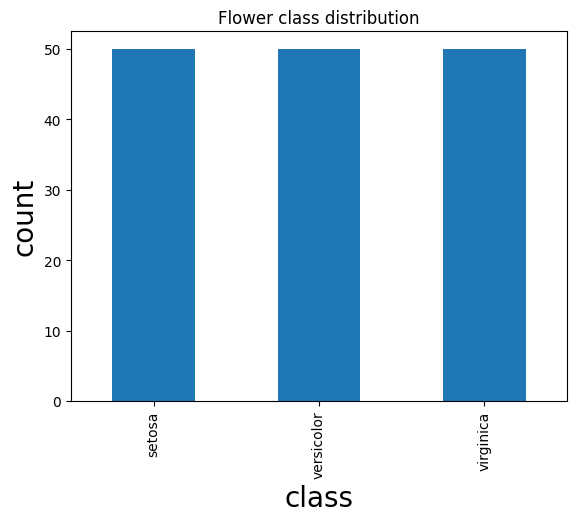

In [ ]:
nameplot=iris_df['species'].value_counts().plot.bar(title='Flower class distribution')
nameplot.set_xlabel('class',size=20)
nameplot.set_ylabel('count',size=20)

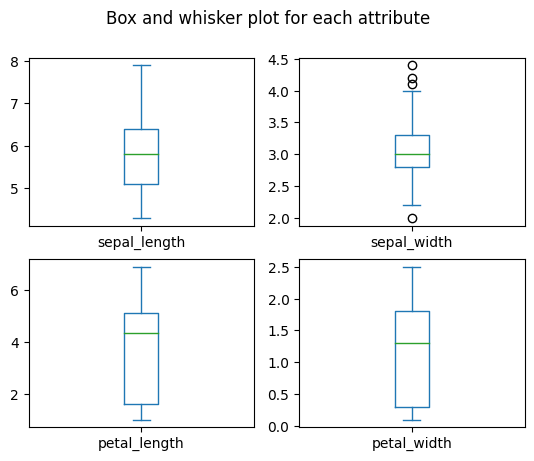

In [ ]:
iris_df.plot(kind='box',subplots=True,layout=(2,2),
sharex=False,sharey=False,title="Box and whisker plot for each attribute")
plt.show()

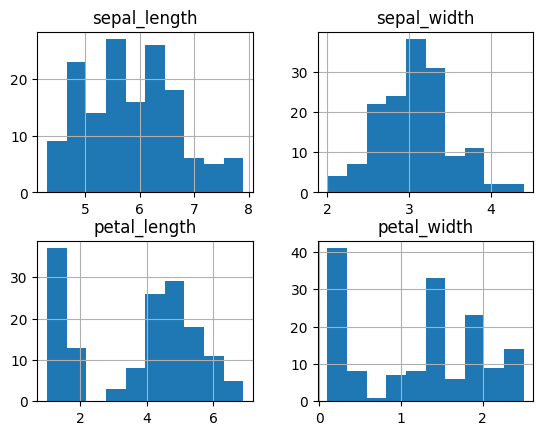

In [ ]:
iris_df.hist()
plt.show()

pairplot is used to visualize the pair-wise relationship in our dataset

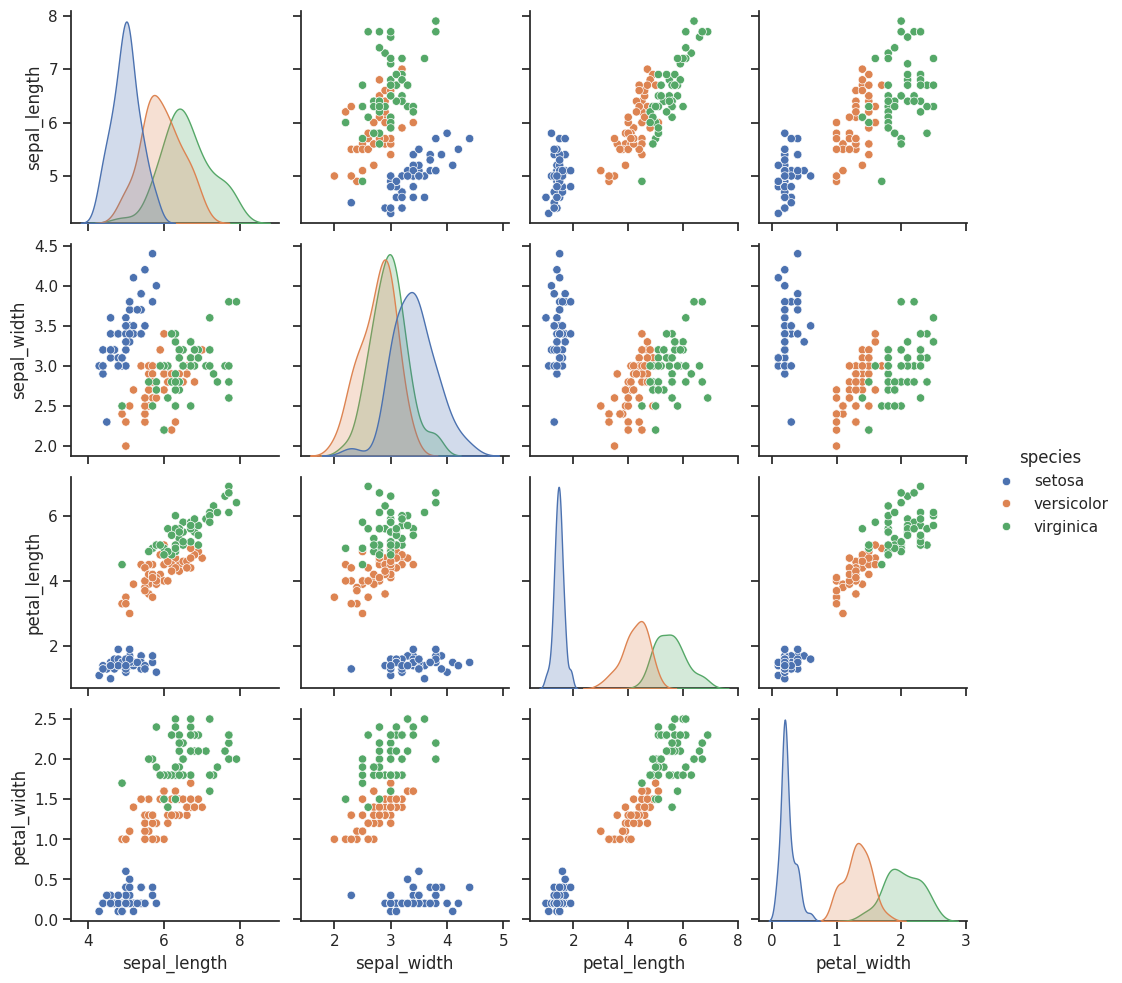

In [ ]:
sns.set(style="ticks")
sns.pairplot(iris_df,hue="species")

Data Modeling: Train-test split

In [ ]:
x=iris_df.drop(['species'],axis=1)
y=iris_df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


Models Building

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class="auto")))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('SVC',SVC(gamma="auto")))
print("Model Accuracy:")
names=[]
accuracy=[]
for name,model in models:
  kfold=KFold(n_splits=10,shuffle=True,random_state=7)
  cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
  names.append(name)
  accuracy.append(cv_results)
  msg="%s:accuracy=%f std=(%f)"%(name,cv_results.mean(),cv_results.std())
  print(msg)

Model Accuracy:
LR:accuracy=0.958333 std=(0.055902)
LDA:accuracy=0.991667 std=(0.025000)
CART:accuracy=0.941667 std=(0.053359)
KNN:accuracy=0.975000 std=(0.053359)
GNB:accuracy=0.950000 std=(0.055277)
SVC:accuracy=0.983333 std=(0.033333)


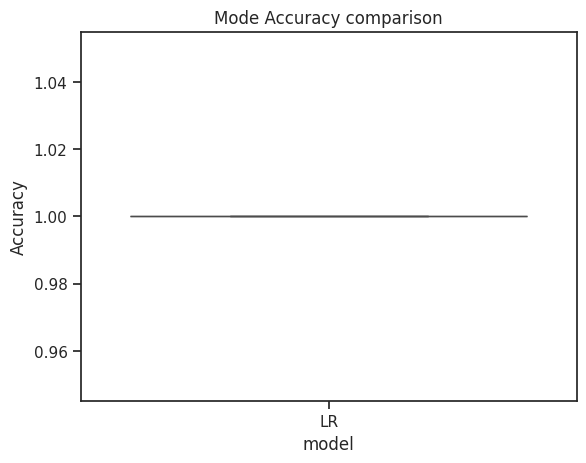

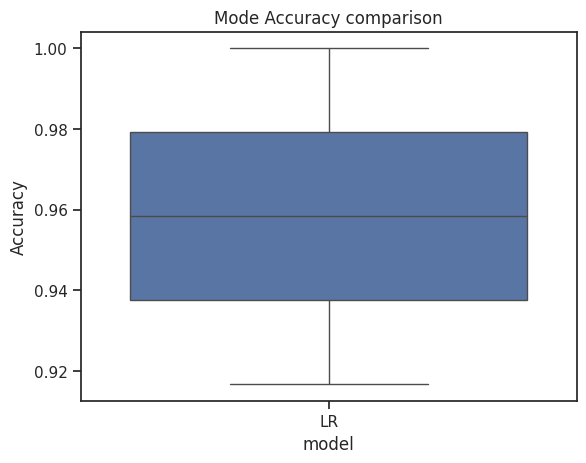

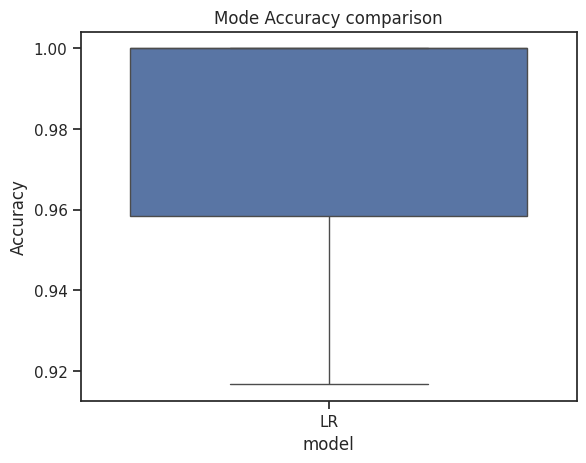

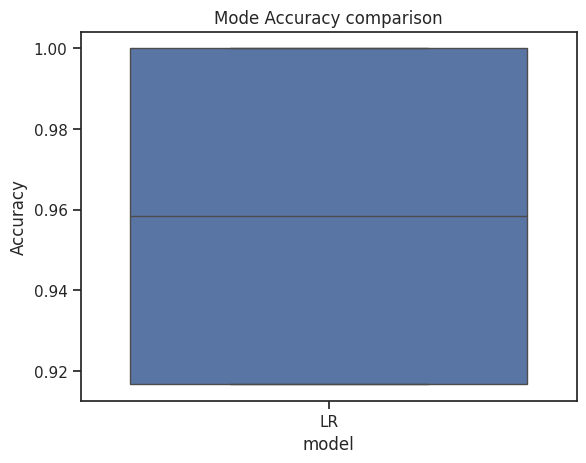

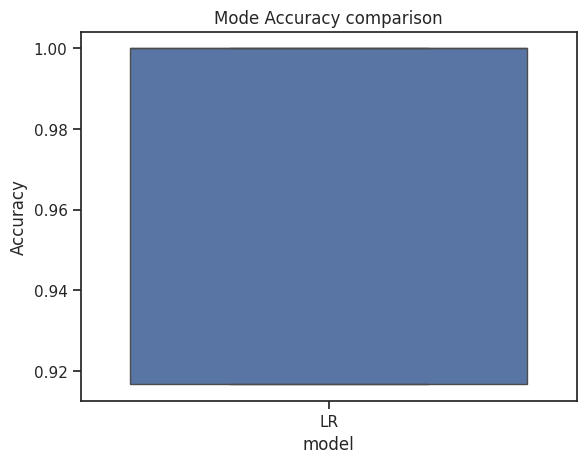

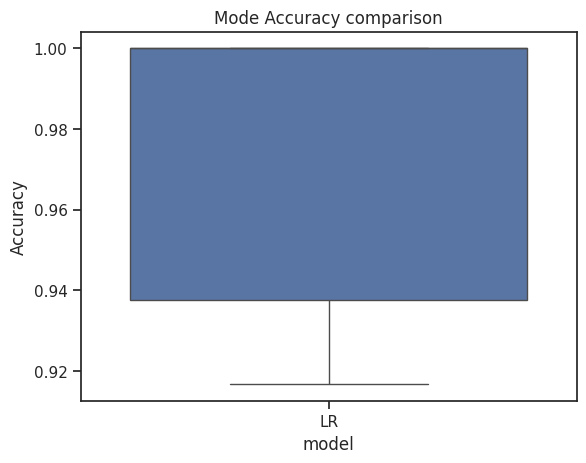

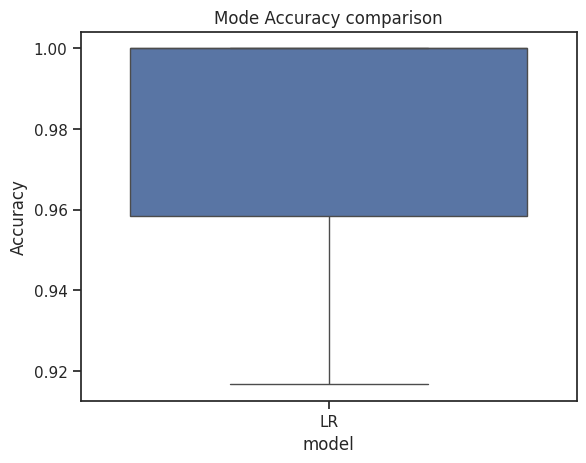

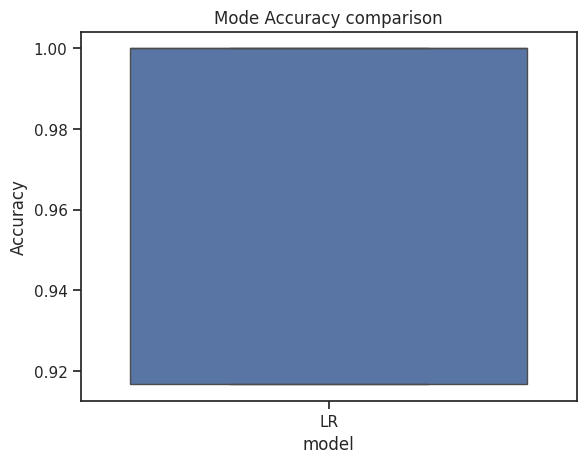

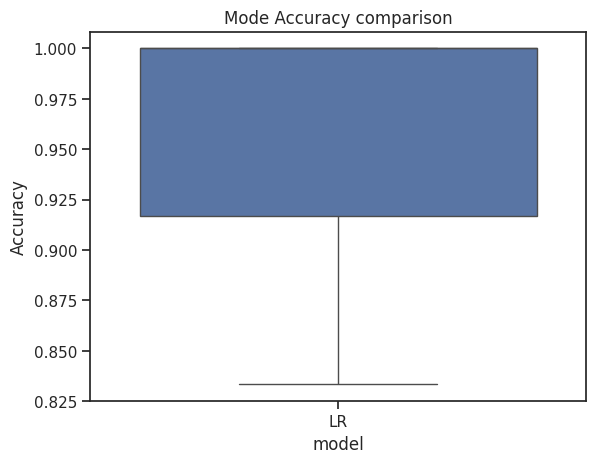

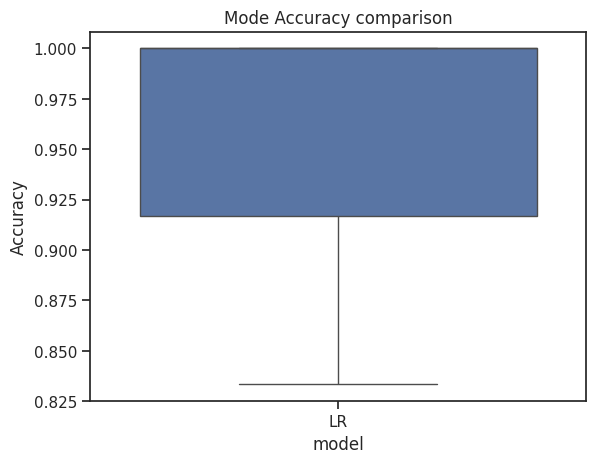

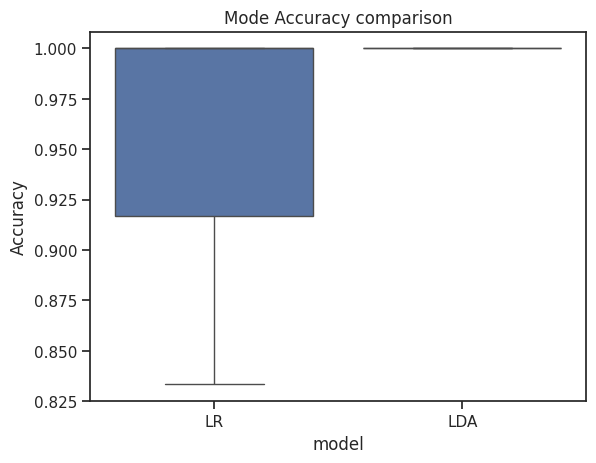

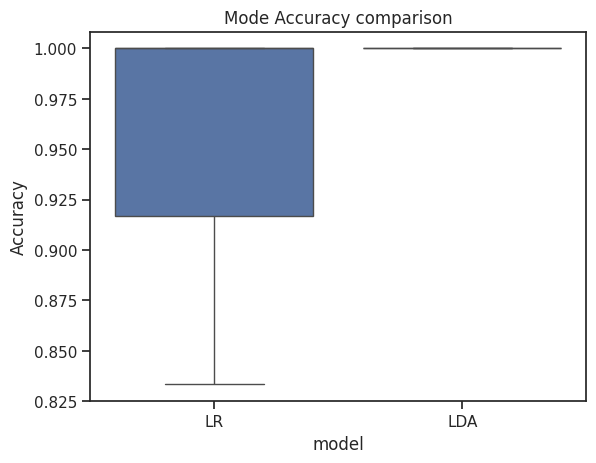

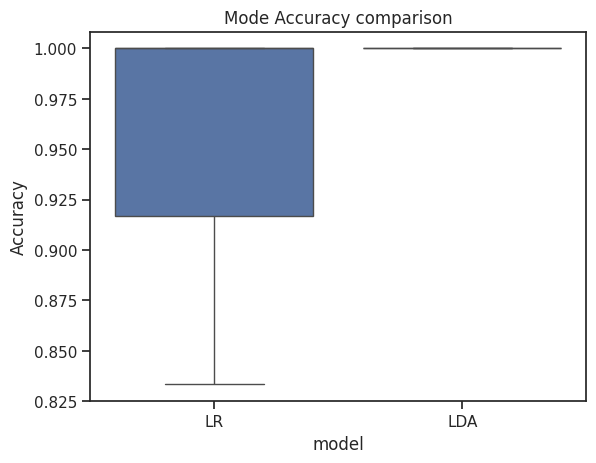

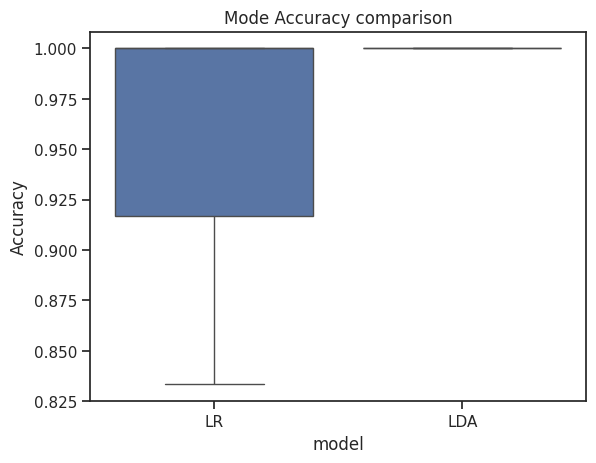

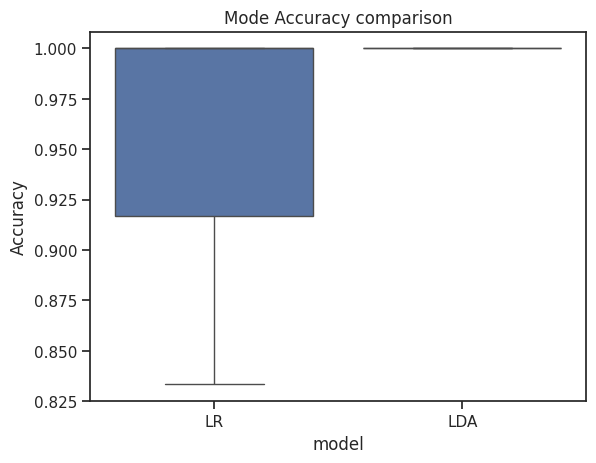

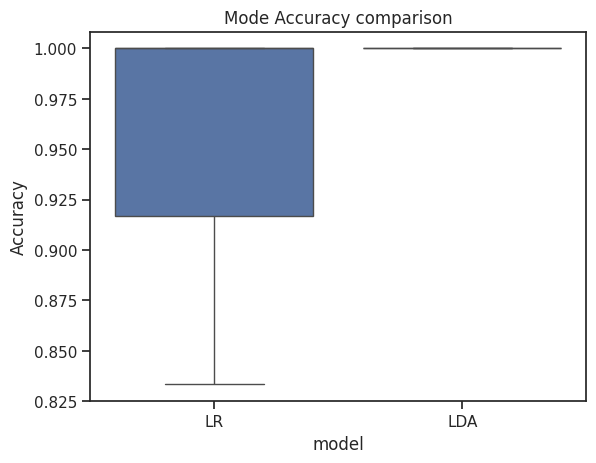

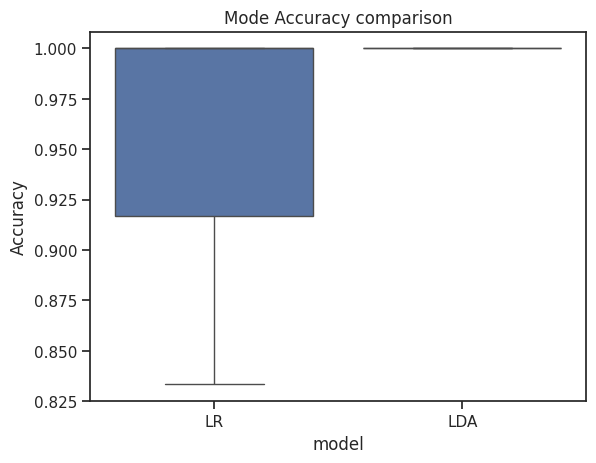

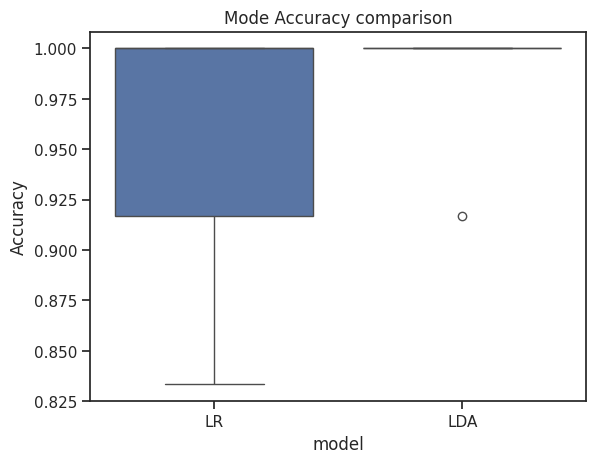

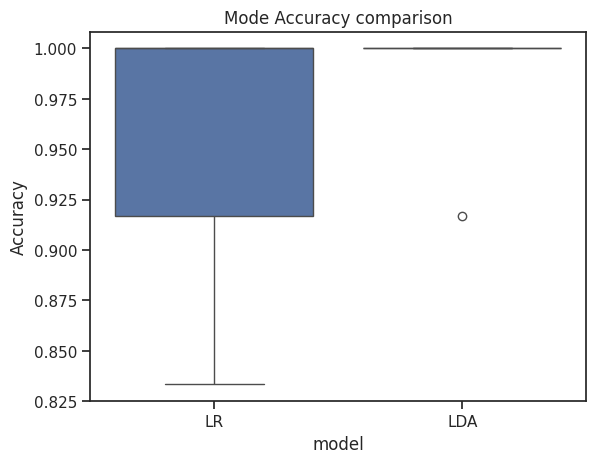

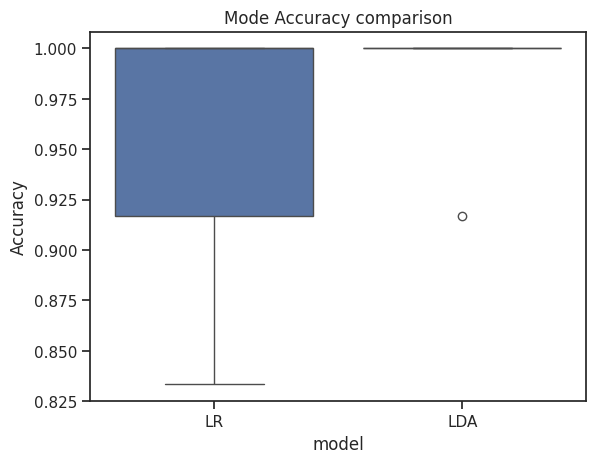

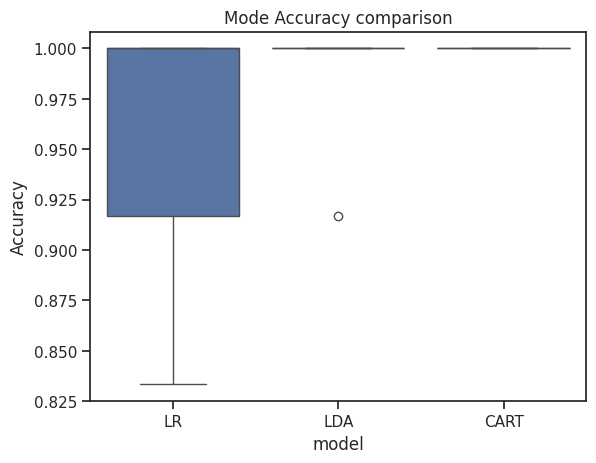

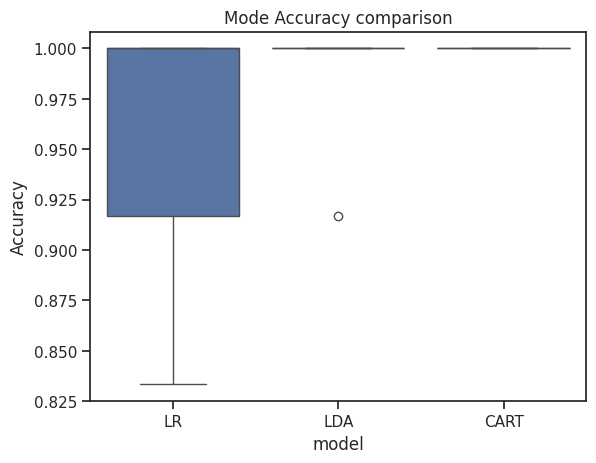

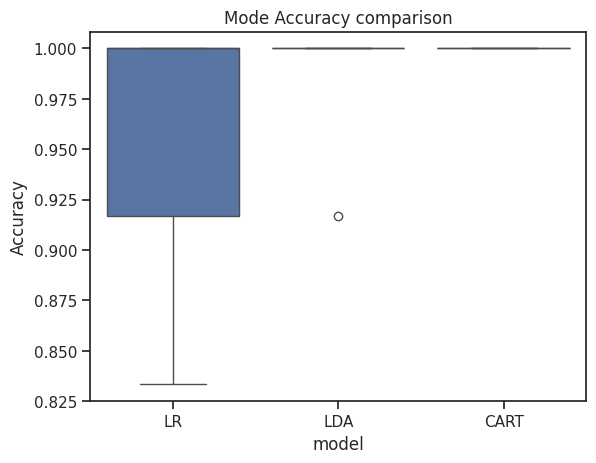

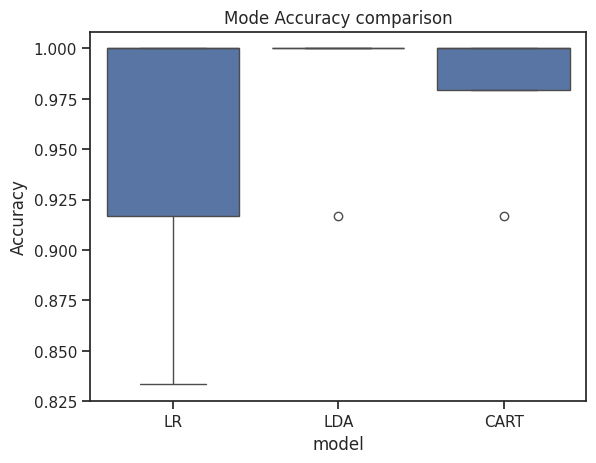

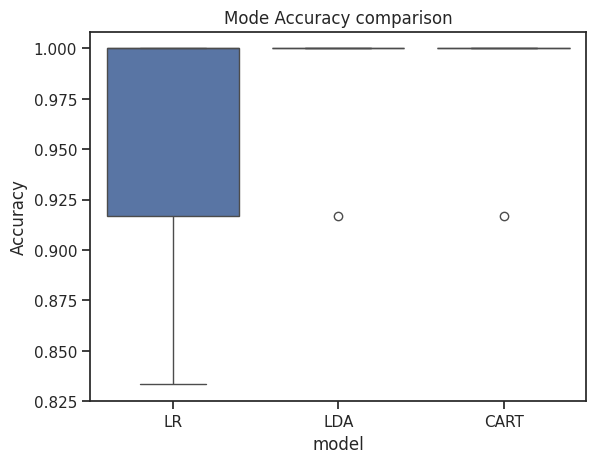

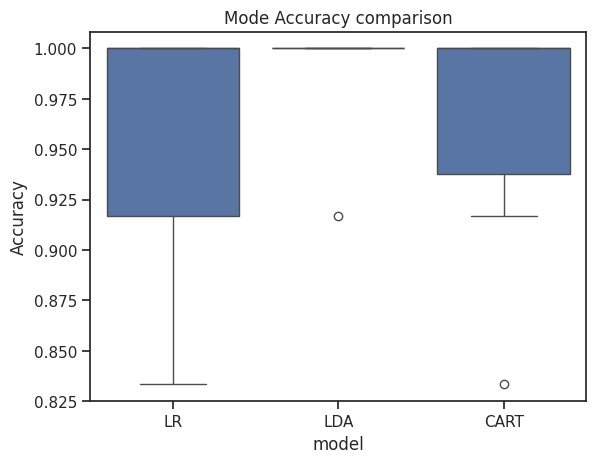

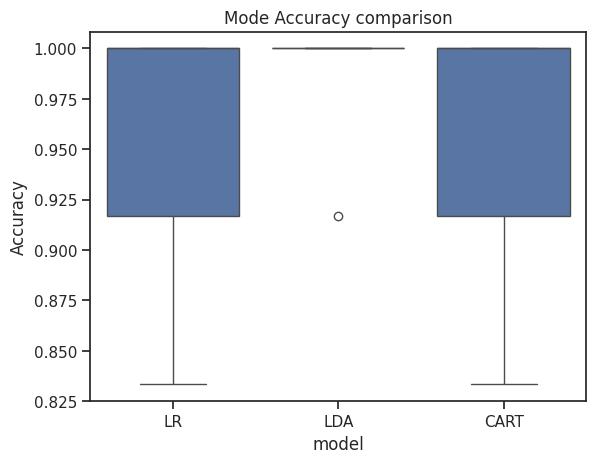

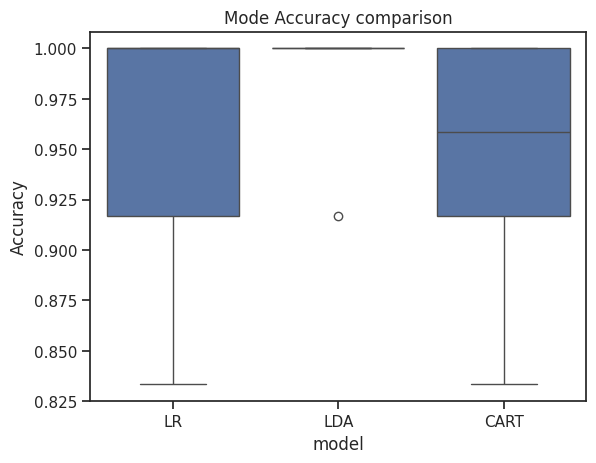

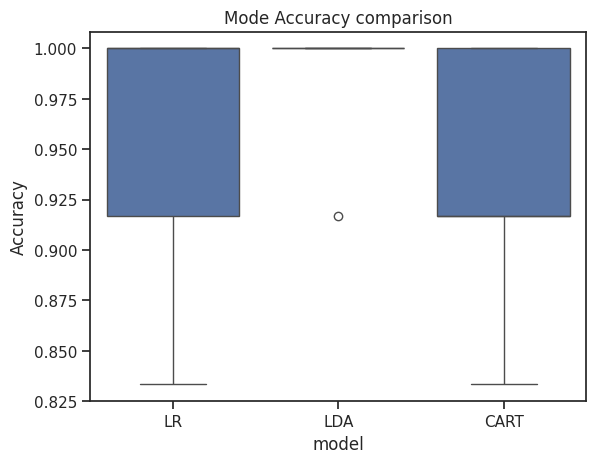

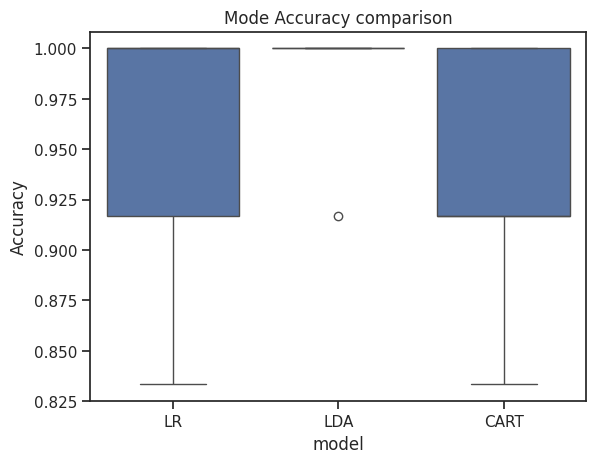

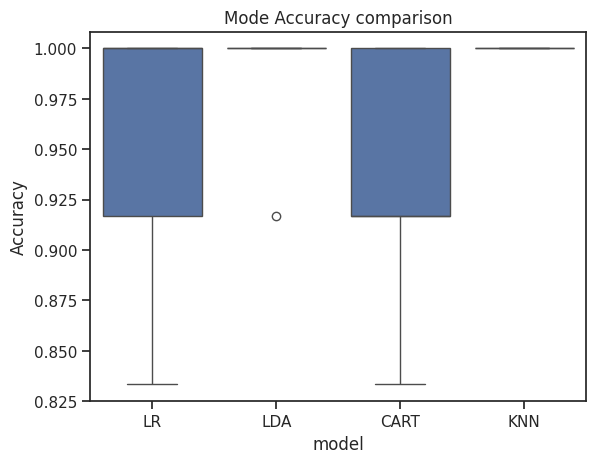

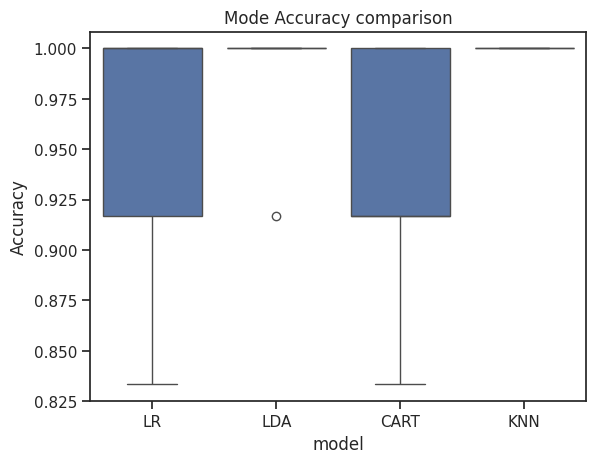

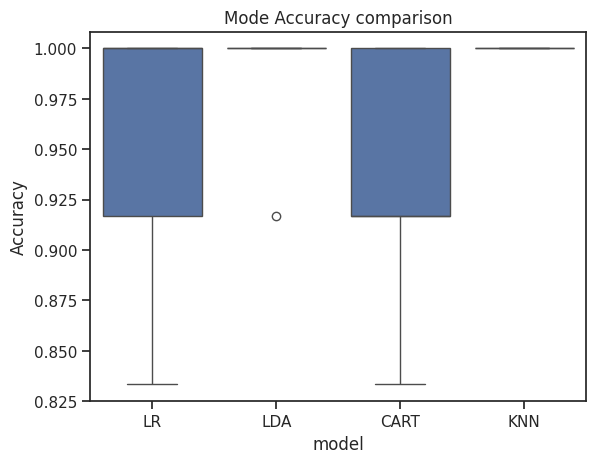

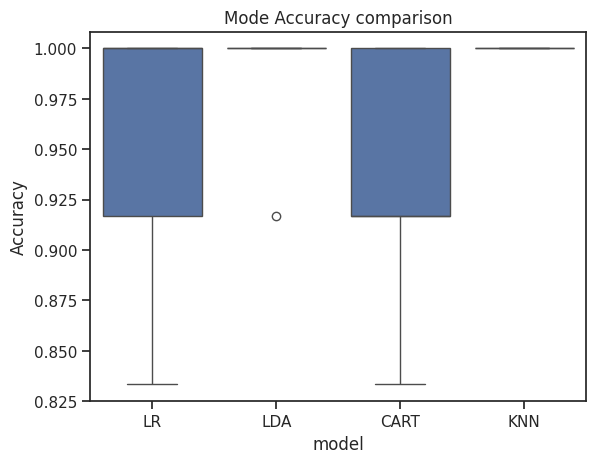

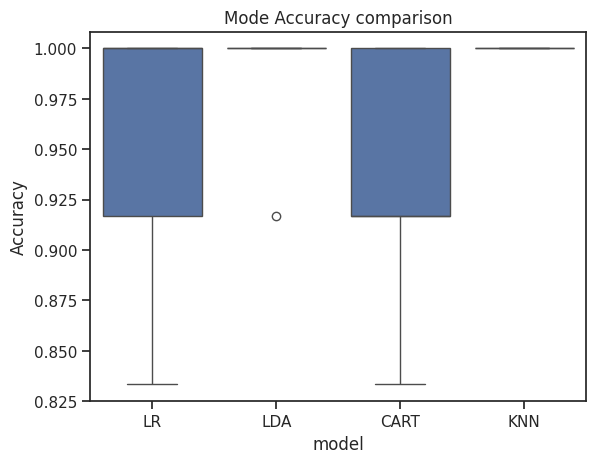

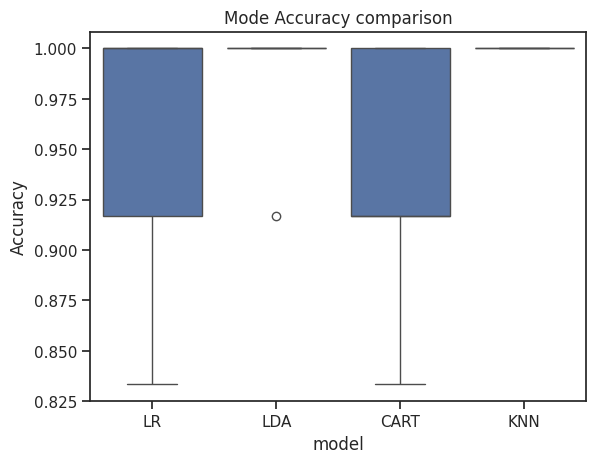

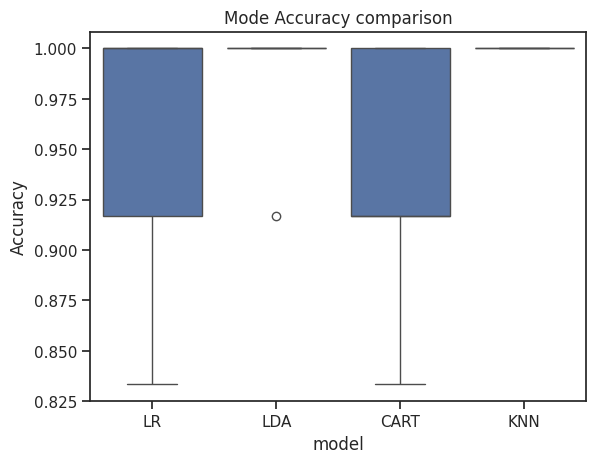

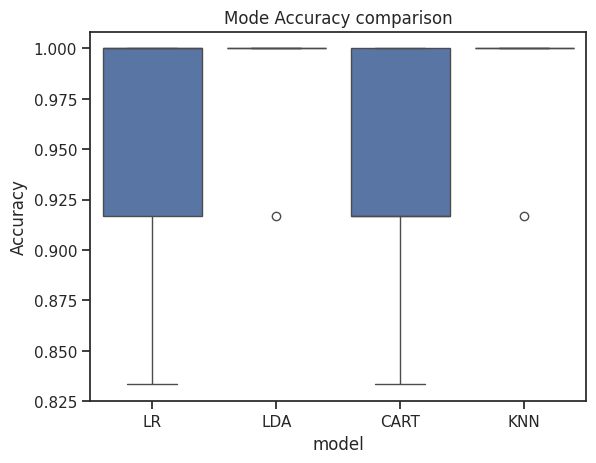

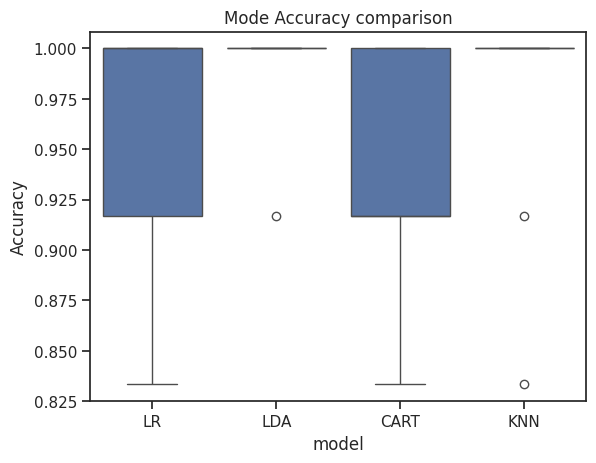

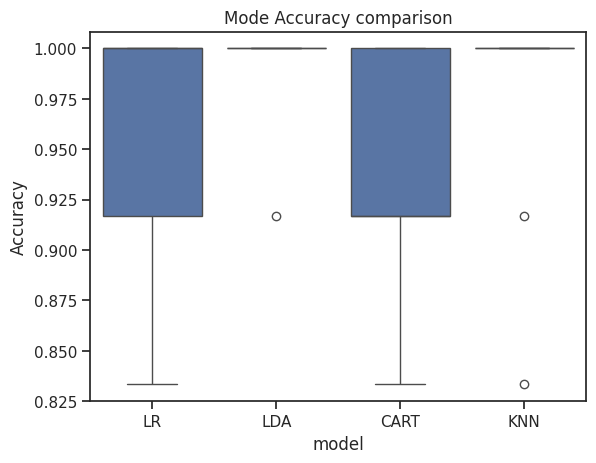

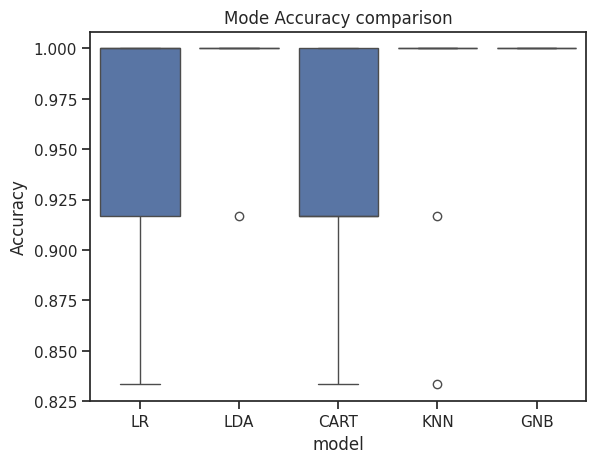

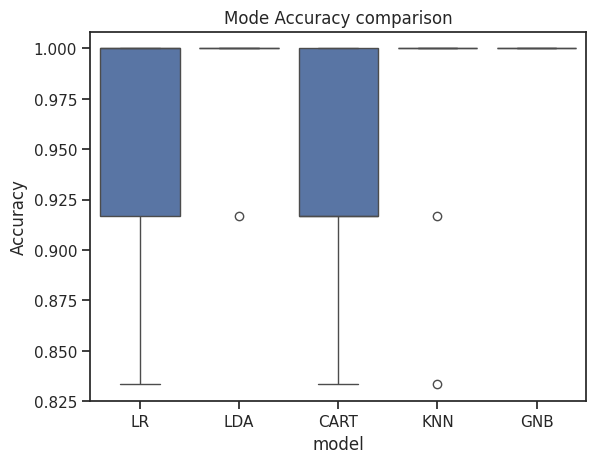

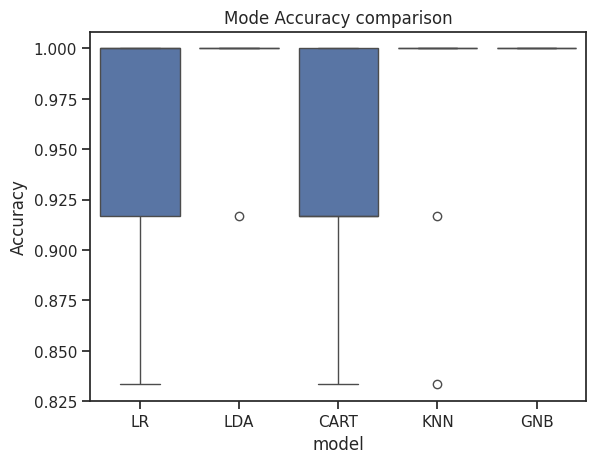

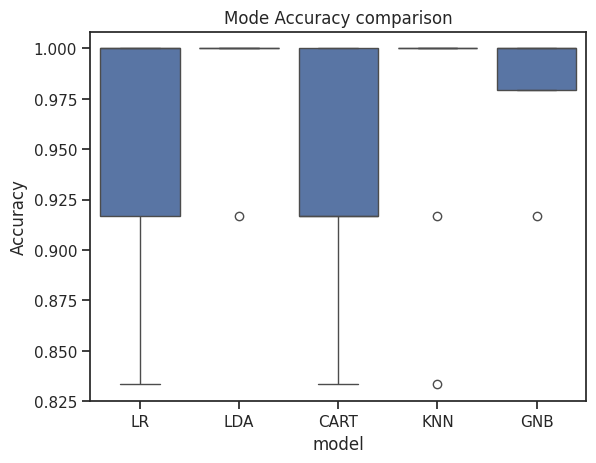

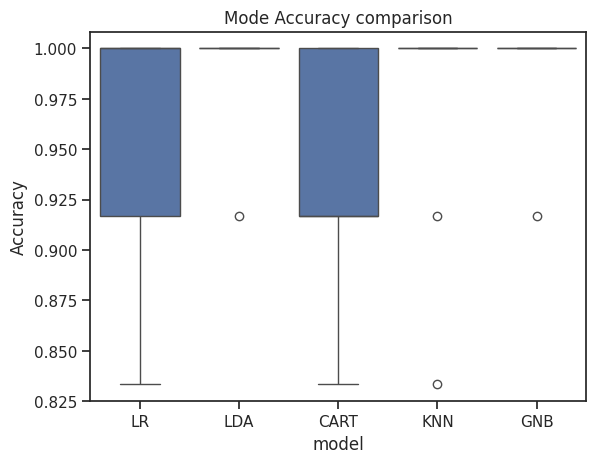

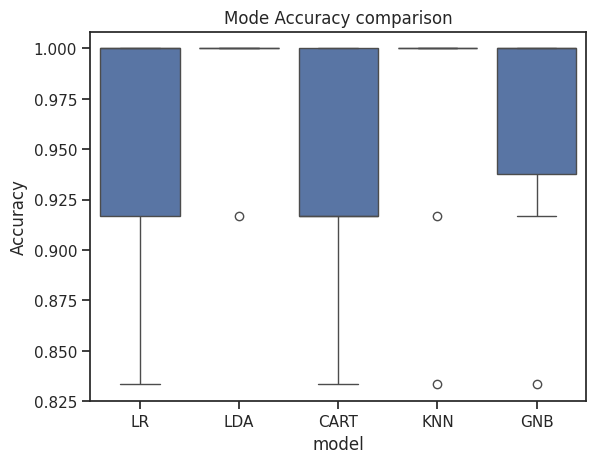

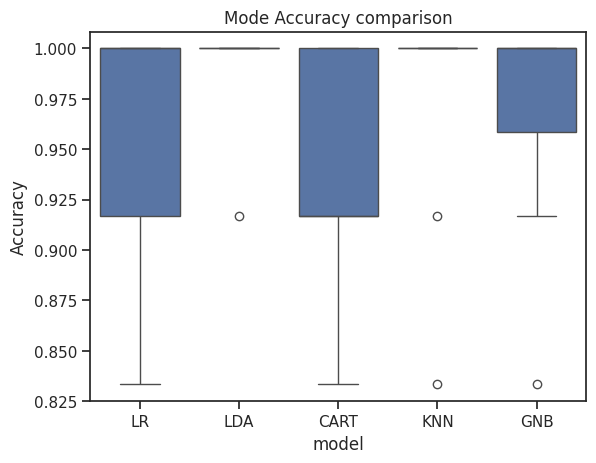

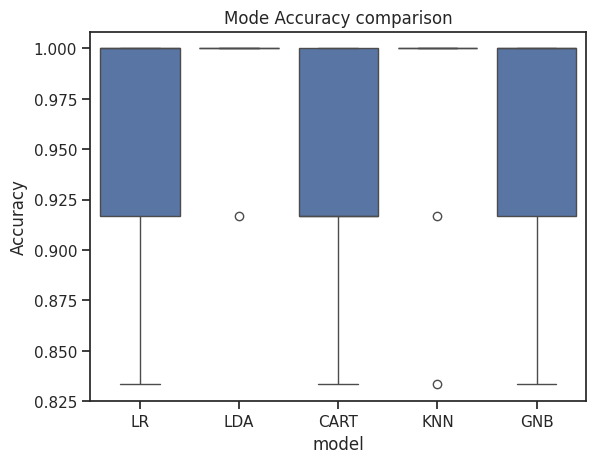

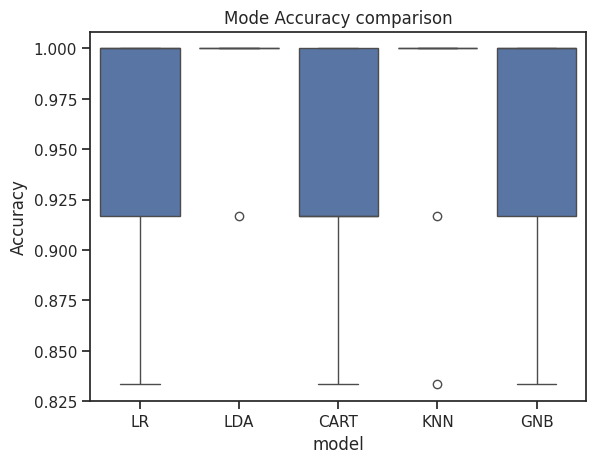

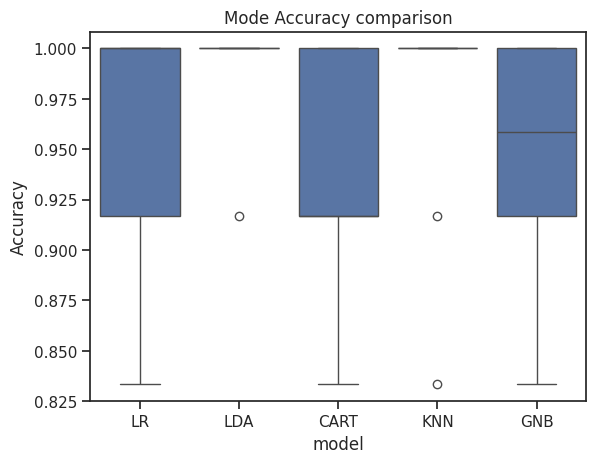

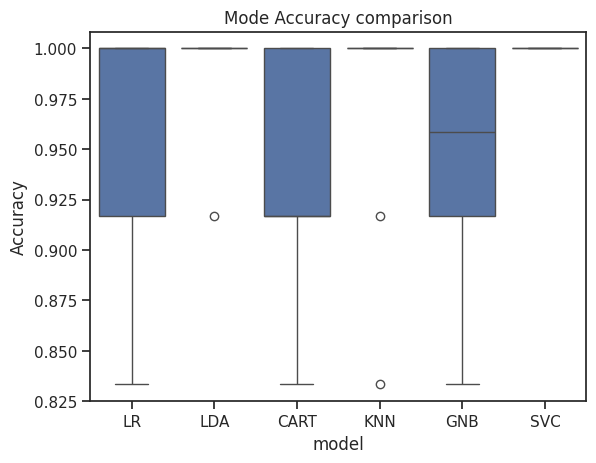

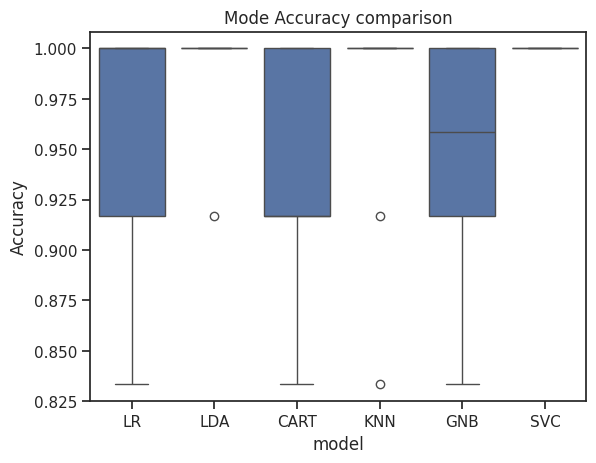

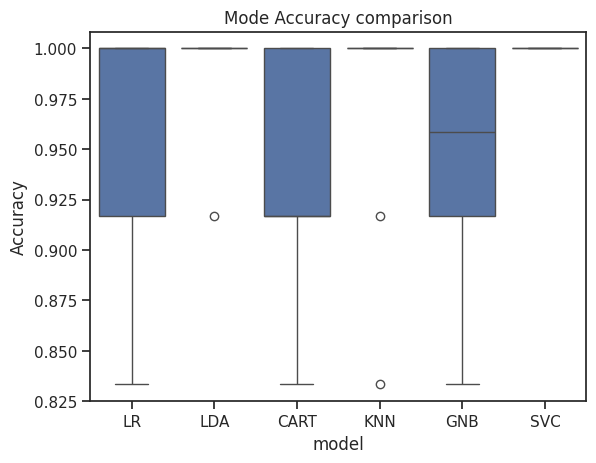

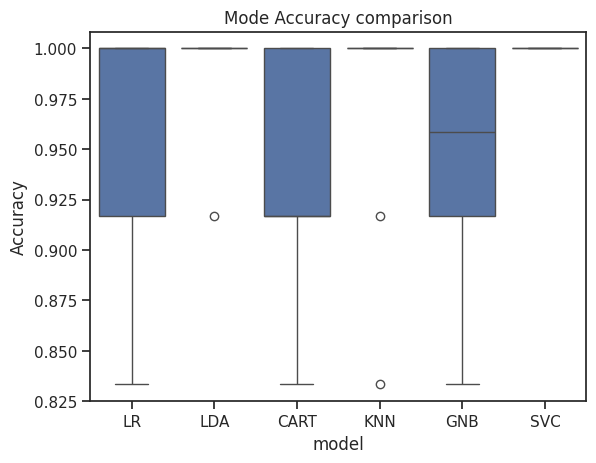

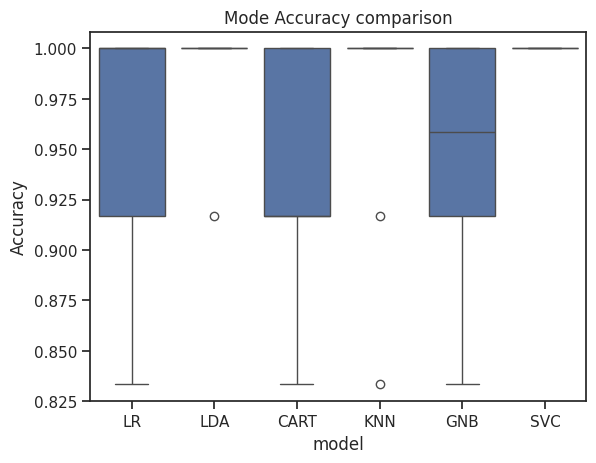

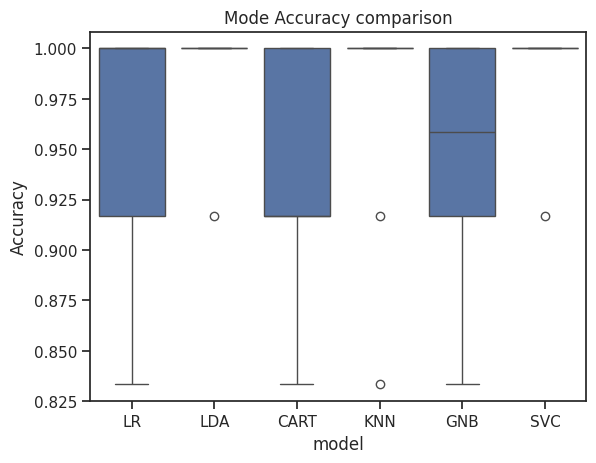

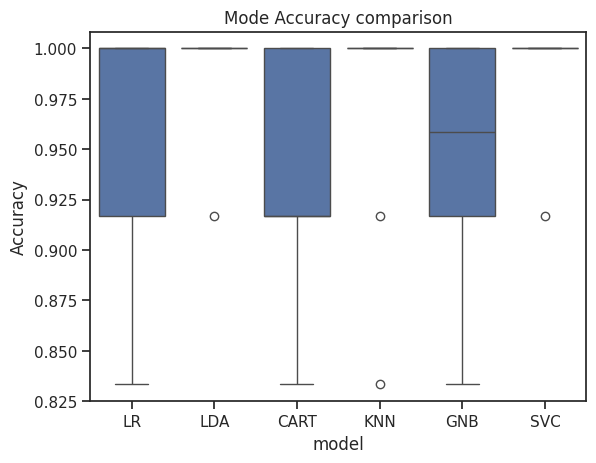

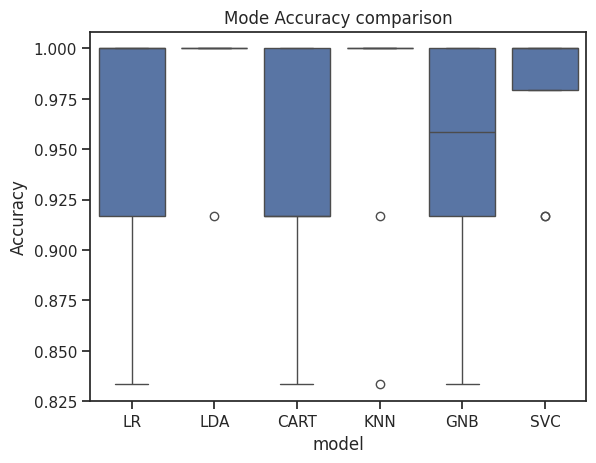

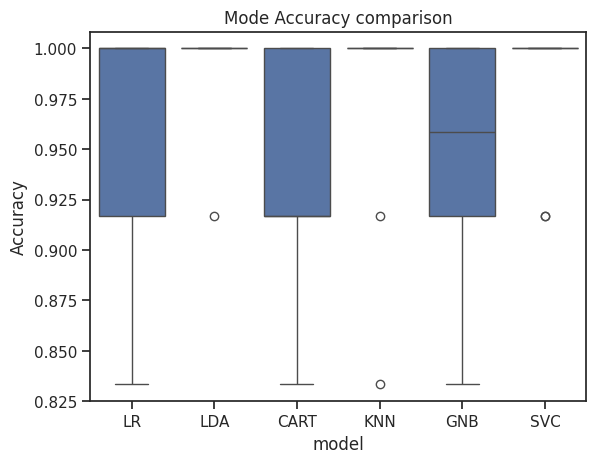

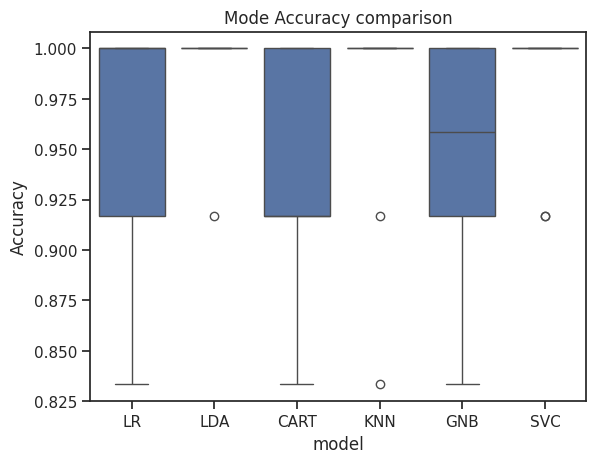

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=[]
for name,acc in zip(names,accuracy):
  for val in acc:
    data.append({'model':name,'Accuracy':val})
    df=pd.DataFrame(data)
    ax=sns.boxplot(x='model',y='Accuracy',data=df)
    ax.set_title('Mode Accuracy comparison')
    plt.show()


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
models=[]
models.append(('KNN',KNeighborsClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('SVC',SVC(gamma="auto")))

We will evalue the testing with accuracy score,confusion matrix and classification report with sklearn

In [ ]:
def test_model(model):
  model.fit(x_train,y_train)
  predictions=model.predict(x_test)
  print("accuracy:",accuracy_score(y_test,predictions))
  print("confusion matrix:")
  print(confusion_matrix(y_test,predictions))
  print("classification report:")
  print(classification_report(y_test,predictions))

In [ ]:
for name,model in models:
  print("------------")
  print("testing",name)
  test_model(model)

------------
testing KNN
accuracy: 0.9666666666666667
confusion matrix:
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]
classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30

------------
testing GNB
accuracy: 0.9666666666666667
confusion matrix:
[[16  0  0]
 [ 0  5  0]
 [ 0  1  8]]
classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.83      1.00      0.91         5
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.94      0.96      0.95        30
weighted avg       0.97      